# Statistik – Kapitel 2: Deskriptive Statistik (Python-Beispiele)

Dieses Notebook enthält die **Python-Beispiele** aus dem Markdown-Kapitel *Deskriptive Statistik* – als ausführbare Zellen.

Autor: **Karsten Keßler**  
Stand: automatisch (Notebook-Erstellung)


In [32]:
# Grundsetup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Für Inline-Plots in Jupyter
%matplotlib inline


## Häufigkeiten

### Absolute Häufigkeit

Die **absolute Häufigkeit** \(h(a)\) ist die Anzahl der Beobachtungen mit Wert \(a\).  
Beispiel: 18 von 50 Personen antworten „Ja“.


In [33]:
# Beispiel-Datensatz (50 Werte: 18x 'Ja', 32x 'Nein')
daten = ['Ja'] * 18 + ['Nein'] * 32
df = pd.DataFrame({'Antwort': daten})

# Absolute Häufigkeiten
h = df['Antwort'].value_counts()
print(h)


Antwort
Nein    32
Ja      18
Name: count, dtype: int64


### Relative Häufigkeit

$
f(a)=\frac{h(a)}{n}.
$

Relative Häufigkeiten sind besonders nützlich, wenn Datensätze unterschiedlicher Größe verglichen werden.


In [34]:
# Relative Häufigkeiten
f = df['Antwort'].value_counts(normalize=True)
print(f)


Antwort
Nein    0.64
Ja      0.36
Name: proportion, dtype: float64


### Summenhäufigkeit (kumuliert)

Für geordnete Merkmale:

$
H(a)=\#\{x_i \le a\}, \qquad F(a)=\frac{H(a)}{n}.
$

Beispiel-Noten: \(2, 3, 1, 3, 4, 2, 3, 1, 2, 5\)


In [35]:
noten = [2, 3, 1, 3, 4, 2, 3, 1, 2, 5]
df_noten = pd.DataFrame({'Note': noten})

# Kumulierte relative Häufigkeiten
F = df_noten['Note'].value_counts(normalize=True).sort_index().cumsum()
print(F)


Note
1    0.2
2    0.5
3    0.8
4    0.9
5    1.0
Name: proportion, dtype: float64


## Grafische Darstellungen

### Balken- und Säulendiagramm

Geeignet für **nominale** und **ordinale** Daten.


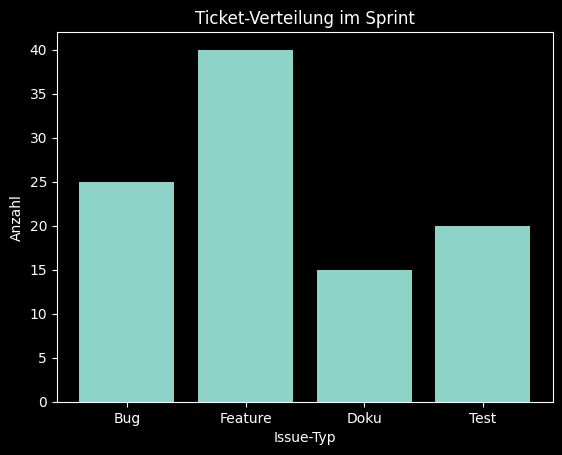

In [36]:
kategorien = ['Bug', 'Feature', 'Doku', 'Test']
haeufigkeiten = [25, 40, 15, 20]

plt.figure()
plt.bar(kategorien, haeufigkeiten)
plt.xlabel('Issue-Typ')
plt.ylabel('Anzahl')
plt.title('Ticket-Verteilung im Sprint')
plt.show()


### Histogramm

Für metrische, klassierte Daten.


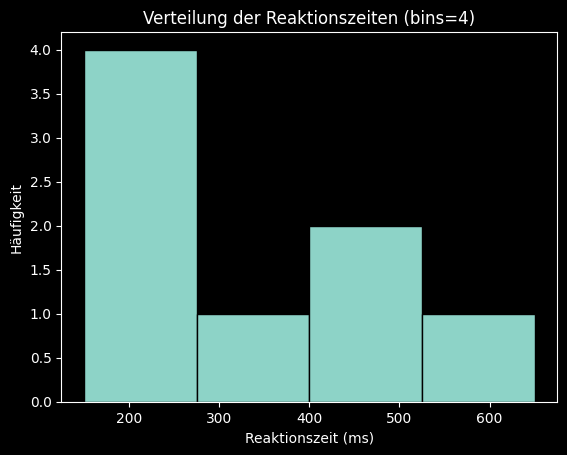

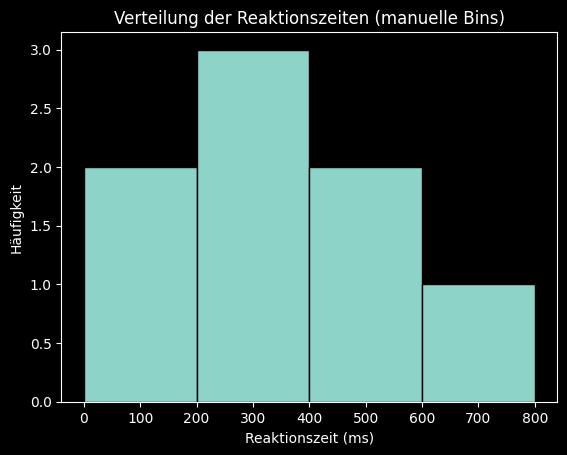

In [37]:
zeiten = np.array([150, 180, 220, 250, 390, 410, 520, 650])

# Automatische Klassenbildung
plt.figure()
plt.hist(zeiten, bins=4, edgecolor='black')
plt.xlabel('Reaktionszeit (ms)')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Reaktionszeiten (bins=4)')
plt.show()

# Mit manuellen Bins
bins = [0, 200, 400, 600, 800]
plt.figure()
plt.hist(zeiten, bins=bins, edgecolor='black')
plt.xlabel('Reaktionszeit (ms)')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Reaktionszeiten (manuelle Bins)')
plt.show()


### Empirische Verteilungsfunktion (EDF)

$
\hat{F}(x)=\frac{1}{n}\sum_{i=1}^{n}\mathbf{1}_{\{x_i \le x\}}.
$


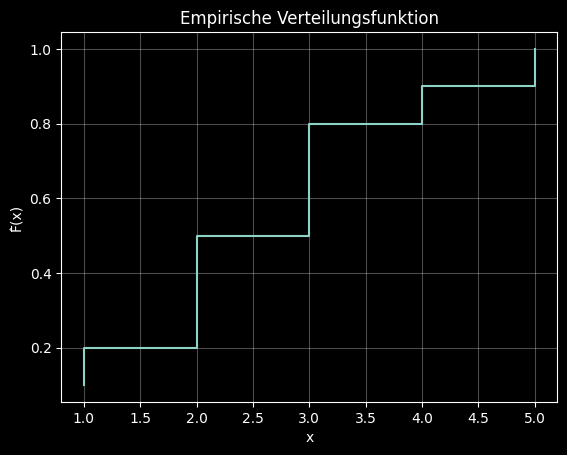

In [38]:
daten = np.array([2, 3, 1, 3, 4, 2, 3, 1, 2, 5])
daten_sortiert = np.sort(daten)
n = len(daten)

# Empirische Verteilungsfunktion
y = np.arange(1, n+1) / n

plt.figure()
plt.step(daten_sortiert, y, where='post')
plt.xlabel('x')
plt.ylabel('F̂(x)')
plt.title('Empirische Verteilungsfunktion')
plt.grid(True, alpha=0.3)
plt.show()


### Boxplot (Überblick)

Vergleich zweier Gruppen (simulierte Daten).


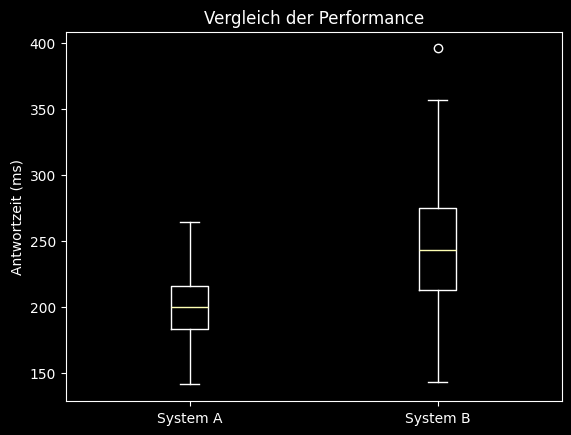

In [39]:
# Reproduzierbarkeit
rng = np.random.default_rng(42)

# Simulierte Daten für zwei Systeme
system_a = rng.normal(200, 30, 100)
system_b = rng.normal(250, 50, 100)

plt.figure()
plt.boxplot([system_a, system_b], tick_labels=['System A', 'System B'])
plt.ylabel('Antwortzeit (ms)')
plt.title('Vergleich der Performance')
plt.show()


## Ausführliches Beispiel: Lieferzeiten-Analyse

Daten:
```python
lieferzeiten = [1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 
                5, 5, 6, 7, 8, 9, 12, 15, 18, 25]
```


In [40]:
lieferzeiten = [1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 
                5, 5, 6, 7, 8, 9, 12, 15, 18, 25]
len(lieferzeiten)


20

### Schritt 1: Häufigkeitstabelle

In [41]:
df_l = pd.DataFrame({'Tage': lieferzeiten})
haeufigkeit = df_l['Tage'].value_counts().sort_index()
print(haeufigkeit)


Tage
1     1
2     3
3     4
4     2
5     2
6     1
7     1
8     1
9     1
12    1
15    1
18    1
25    1
Name: count, dtype: int64


### Schritt 2: Histogramm

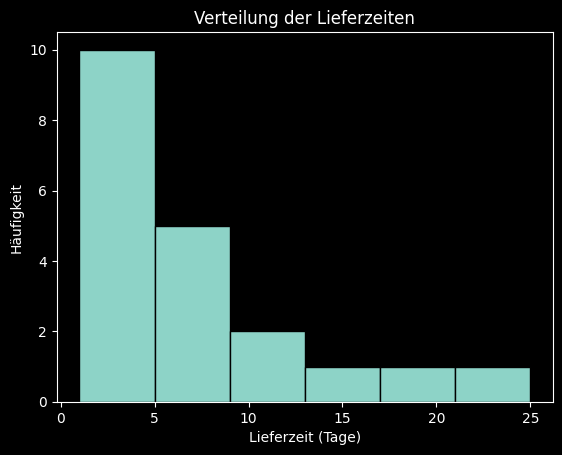

In [42]:
plt.figure()
plt.hist(lieferzeiten, bins=6, edgecolor='black')
plt.xlabel('Lieferzeit (Tage)')
plt.ylabel('Häufigkeit')
plt.title('Verteilung der Lieferzeiten')
plt.show()


### Schritt 3: Empirische Verteilungsfunktion

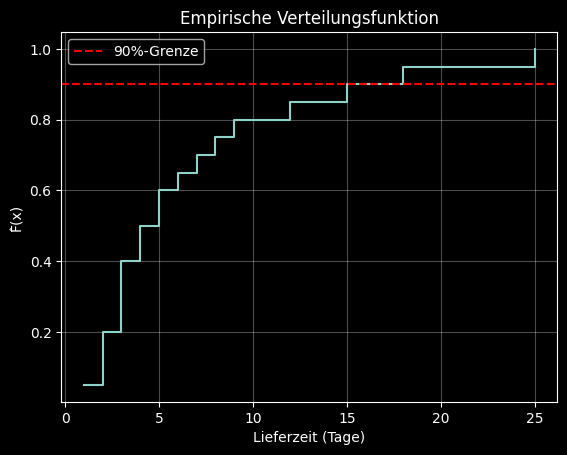

In [43]:
daten_sortiert = np.sort(lieferzeiten)
n = len(lieferzeiten)
F = np.arange(1, n+1) / n

plt.figure()
plt.step(daten_sortiert, F, where='post')
plt.xlabel('Lieferzeit (Tage)')
plt.ylabel('F̂(x)')
plt.title('Empirische Verteilungsfunktion')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.9, color='r', linestyle='--', label='90%-Grenze')
plt.legend()
plt.show()


**Fragen (automatisch berechnet):**

- Wie viel Prozent der Lieferungen dauern höchstens 2 Tage?
- Innerhalb welcher Zeit werden 90% der Lieferungen abgeschlossen?


In [44]:
# Anteil <= 2 Tage
anteil_le_2 = np.mean(np.array(lieferzeiten) <= 2)
print(f"Anteil <= 2 Tage: {anteil_le_2:.2%}")

# 90%-Quantil (kleinstes x mit F̂(x) >= 0.9)
x_90 = np.quantile(lieferzeiten, 0.9, method="higher")
print(f"Zeit für 90% abgeschlossen (empirisch, 'higher'): {x_90} Tage")


Anteil <= 2 Tage: 20.00%
Zeit für 90% abgeschlossen (empirisch, 'higher'): 18 Tage


### Schritt 4: Boxplot

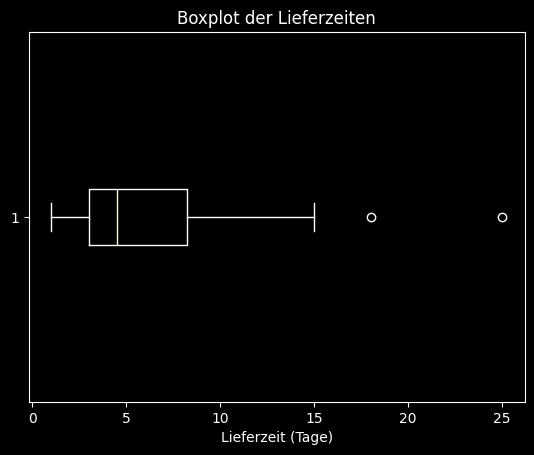

In [45]:
plt.figure()
plt.boxplot(lieferzeiten, vert=False)
plt.xlabel('Lieferzeit (Tage)')
plt.title('Boxplot der Lieferzeiten')
plt.show()


### Schritt 5: Kennzahlen

In [46]:
print(f"Mittelwert: {np.mean(lieferzeiten):.2f} Tage")
print(f"Median: {np.median(lieferzeiten):.2f} Tage")
print(f"Standardabweichung (ddof=1): {np.std(lieferzeiten, ddof=1):.2f} Tage")


Mittelwert: 6.85 Tage
Median: 4.50 Tage
Standardabweichung (ddof=1): 6.24 Tage


## Zusammenfassung

- Absolute / relative / kumulierte Häufigkeiten
- Balkendiagramm, Histogramm, empirische Verteilungsfunktion, Boxplot
- Beispiel: Lieferzeitenanalyse mit Interpretation

> Tipp: Für echte Datensätze am Anfang oft hilfreich:  
> `df.info()`, `df.describe()`, `df.isna().sum()`
